<a href="https://www.kaggle.com/code/ringuyenezathimothe/day-1-prompting?scriptVersionId=207154114" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Day 1 - Prompting

Welcome to the Kaggle 5-day Generative AI course!

This notebook will show you how to get started with the Gemini API and walk you through some of the example prompts and techniques that you can also read about in the Prompting whitepaper. You don't need to read the whitepaper to use this notebook, but the papers will give you some theoretical context and background to complement this interactive notebook.


## Before you begin

In this notebook, you'll start exploring prompts and prompt parameters using the Python SDK and AI Studio. For some inspiration, you might enjoy exploring some apps that have been built using the Gemini family of models. Here are a few that we like, and we think you will too.

* [TextFX](https://textfx.withgoogle.com/) is a suite of AI-powered tools for rappers, made in collaboration with Lupe Fiasco,
* [SQL Talk](https://sql-talk-r5gdynozbq-uc.a.run.app/) shows how you can talk directly to a database using the Gemini API,
* [NotebookLM](https://notebooklm.google/) uses Gemini models to build your own personal AI research assistant.


## For help

**Common issues are covered in the [FAQ and troubleshooting guide](https://www.kaggle.com/code/markishere/day-0-troubleshooting-and-faqs).**

### A note on the Gemini API and Vertex AI

In the whitepapers, most of the example code uses the Enterprise [Vertex AI platform](https://cloud.google.com/vertex-ai). In contrast, this notebook, along with the others in this series, will use the [Gemini Developer API](https://ai.google.dev/gemini-api/) and [AI Studio](https://aistudio.google.com/).

Both APIs provide access to the Gemini family of models, and the code to interact with the models is very similar. Vertex provides a world-class platform for enterprises, governments and advanced users that need powerful features like data governance, ML ops and deep Google Cloud integration.

AI Studio is free to use and only requires a compatible Google account to log in and get started. It is deeply integrated with the Gemini API, which comes with a generous [free tier](https://ai.google.dev/pricing) that you can use to run the code in these exercises.

If you are already set up with Google Cloud, you can check out the [Enterprise Gemini API](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/inference) through Vertex AI, and run the samples directly from the supplied whitepapers.

## Get started with Kaggle notebooks

If this is your first time using a Kaggle notebook, welcome! You can read about how to use Kaggle notebooks [in the docs](https://www.kaggle.com/docs/notebooks).

First, you will need to phone verify your account at kaggle.com/settings.

![](https://storage.googleapis.com/kaggle-media/Images/5dgai_0.png)
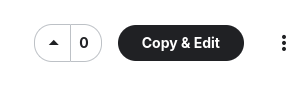
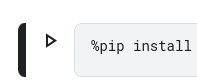

To run this notebook, as well as the others in this course, you will need to make a copy, or fork, the notebook. Look for the `Copy and Edit` button in the top-right, and **click it** to make an editable, private copy of the notebook. It should look like this one:

![Copy and Edit button](https://storage.googleapis.com/kaggle-media/Images/5gdai_sc_1.png)

Your copy will now have a ▶️ **Run** button next to each code cell that you can press to execute that cell. These notebooks are expected to be run in order from top-to-bottom, but you are encouraged to add new cells, run your own code and explore. If you get stuck, you can try the `Factory reset` option in the `Run` menu, or head back to the original notebook and make a fresh copy.

![Run cell button](https://storage.googleapis.com/kaggle-media/Images/5gdai_sc_2.png)

### Problems?

If you have any problems, head over to the [Kaggle Discord](https://discord.com/invite/kaggle), find the [`#5dgai-q-and-a` channel](https://discord.com/channels/1101210829807956100/1303438695143178251) and ask for help.

## Get started with the Gemini API

All of the exercises in this notebook will use the [Gemini API](https://ai.google.dev/gemini-api/) by way of the [Python SDK](https://pypi.org/project/google-generativeai/). Each of these prompts can be accessed directly in [Google AI Studio](https://aistudio.google.com/) too, so if you would rather use a web interface and skip the code for this activity, look for the <img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> AI Studio link on each prompt.

Next, you will need to add your API key to your Kaggle Notebook as a Kaggle User Secret.

![](https://storage.googleapis.com/kaggle-media/Images/5dgai_1.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_2.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_3.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_4.png)

### Install the SDK

In [2]:
%pip install -U -q "google-generativeai>=0.8.3"

Note: you may need to restart the kernel to use updated packages.


In [3]:
import google.generativeai as genai
from IPython.display import HTML, Markdown, display

### Set up your API key

To run the following cell, your API key must be stored it in a [Kaggle secret](https://www.kaggle.com/discussions/product-feedback/114053) named `GOOGLE_API_KEY`.

If you don't already have an API key, you can grab one from [AI Studio](https://aistudio.google.com/app/apikey). You can find [detailed instructions in the docs](https://ai.google.dev/gemini-api/docs/api-key).

To make the key available through Kaggle secrets, choose `Secrets` from the `Add-ons` menu and follow the instructions to add your key or enable it for this notebook.

In [4]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

If you received an error response along the lines of `No user secrets exist for kernel id ...`, then you need to add your API key via `Add-ons`, `Secrets` **and** enable it.

![Screenshot of the checkbox to enable GOOGLE_API_KEY secret](https://storage.googleapis.com/kaggle-media/Images/5gdai_sc_3.png)
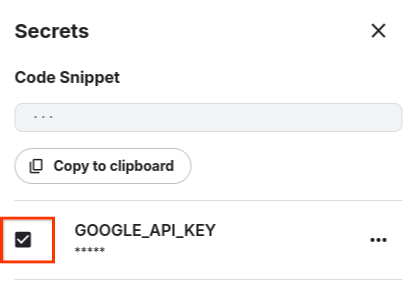

### Run your first prompt

In this step, you will test that your API key is set up correctly by making a request. The `gemini-1.5-flash` model has been selected here.

In [5]:
flash = genai.GenerativeModel('gemini-1.5-flash')
response = flash.generate_content("Explain AI to me like I'm a kid.")
print(response.text)

Imagine you have a super smart computer that can learn just like you!  It's called Artificial Intelligence, or AI for short. 

Think about how you learn:

* **You see things:**  AI can "see" pictures and videos and learn from them.
* **You hear things:** AI can "hear" sounds and learn from them.
* **You read things:** AI can "read" words and learn from them.
* **You try things:** AI can try things out and learn from the results.

Just like you, AI gets better at things the more it practices. It can help us do all sorts of cool things, like:

* **Play games:** Some video games use AI to make the characters act smarter.
* **Translate languages:** AI can help you understand people who speak different languages.
* **Find information:** AI helps search engines find the best answers to your questions.
* **Drive cars:** Some cars are starting to drive themselves using AI.

AI is still learning and growing, just like you!  It's helping us make the world a better place, one smart computer at a 

The response often comes back in markdown format, which you can render directly in this notebook.

In [6]:
Markdown(response.text)

Imagine you have a super smart computer that can learn just like you!  It's called Artificial Intelligence, or AI for short. 

Think about how you learn:

* **You see things:**  AI can "see" pictures and videos and learn from them.
* **You hear things:** AI can "hear" sounds and learn from them.
* **You read things:** AI can "read" words and learn from them.
* **You try things:** AI can try things out and learn from the results.

Just like you, AI gets better at things the more it practices. It can help us do all sorts of cool things, like:

* **Play games:** Some video games use AI to make the characters act smarter.
* **Translate languages:** AI can help you understand people who speak different languages.
* **Find information:** AI helps search engines find the best answers to your questions.
* **Drive cars:** Some cars are starting to drive themselves using AI.

AI is still learning and growing, just like you!  It's helping us make the world a better place, one smart computer at a time. 😊 


### Start a chat

The previous example uses a single-turn, text-in/text-out structure, but you can also set up a multi-turn chat structure too.

In [7]:
chat = flash.start_chat(history=[])
response = chat.send_message('Hello! My name is Thim.')
print(response.text)

Hello Thim! 👋  Nice to meet you. 😊 What can I do for you today? 



In [8]:
response = chat.send_message('Can you tell something interesting about dinosaurs?')
print(response.text)

Of course! Dinosaurs are endlessly fascinating! 

Here's something interesting:

**Did you know that some dinosaurs had feathers?** 

While the classic image of a dinosaur might be a scaly beast, we now know that many species, including the iconic Tyrannosaurus Rex, had feathers!  This discovery changed our understanding of these ancient creatures and opened up new possibilities about their appearance, behavior, and even their evolutionary links to birds. 

Do you want to learn more about feathered dinosaurs, or perhaps something else about these incredible creatures?  Just let me know! 🦖 



In [9]:
# While you have the `chat` object around, the conversation state
# persists. Confirm that by asking if it knows my name.
response = chat.send_message('Do you remember what my name is?')
print(response.text)

You are right! I apologize, I am still under development and learning to remember things like names.  

My memory is not perfect yet, but I'm working on it!   

Would you mind reminding me of your name? 😊 



### Choose a model

The Gemini API provides access to a number of models from the Gemini model family. Read about the available models and their capabilities on the [model overview page](https://ai.google.dev/gemini-api/docs/models/gemini).

In this step you'll use the API to list all of the available models.

In [10]:
for model in genai.list_models():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/embedding-001
models/text-embedding-004
models/aqa


The [`models.list`](https://ai.google.dev/api/models#method:-models.list) response also returns additional information about the model's capabilities, like the token limits and supported parameters.

In [11]:
for model in genai.list_models():
  if model.name == 'models/gemini-1.5-flash':
    print(model)
    break

Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=1000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=40)


## Explore generation parameters



### Output length

When generating text with an LLM, the output length affects cost and performance. Generating more tokens increases computation, leading to higher energy consumption, latency, and cost.

To stop the model from generating tokens past a limit, you can specify the `max_output_length` parameter when using the Gemini API. Specifying this parameter does not influence the generation of the output tokens, so the output will not become more stylistically or textually succinct, but it will stop generating tokens once the specified length is reached. Prompt engineering may be required to generate a more complete output for your given limit.

In [12]:
short_model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(max_output_tokens=200))

response = short_model.generate_content('Write a 1000 word essay on the importance of olives in modern society.')
print(response.text)

## The Olive: A Global Icon of Taste, Culture, and Sustainability

The humble olive, a small, fleshy fruit, holds a significance far greater than its size might suggest. Its history stretches back millennia, deeply intertwined with the cultural and culinary landscapes of the Mediterranean basin and beyond. In modern society, the olive continues to play a vital role, not only as a beloved culinary ingredient but also as a symbol of tradition, health, and environmental sustainability. 

The olive's journey from ancient staple to modern icon is a testament to its adaptability and resilience. From its origins in the Levant, the olive spread across the Mediterranean, finding fertile ground in Greece, Italy, Spain, and beyond. In ancient Rome, it was considered a sacred fruit, symbolizing peace and prosperity. It fueled the Roman empire, providing nourishment for soldiers and citizens alike. Olive oil, a byproduct of the fruit, was used for cooking, lighting, and even as a form of currency.


In [13]:
response = short_model.generate_content('Write a short poem on the importance of olives in modern society.')
print(response.text)

A tiny fruit, with skin of green or black,
A briny taste, a savory snack.
From ancient groves, a gift they bring,
A flavor bright, on every tongue to cling.

From salad bowls to pizza's crust,
They lend a touch, a taste we trust.
In oil they shine, a golden gleam,
A healthy heart, a savory dream.

A symbol strong, of peace and grace,
A humble food, in every place.
The olive's charm, a timeless tale,
A simple gift, that never fails. 



Explore with your own prompts. Try a prompt with a restrictive output limit and then adjust the prompt to work within that limit.

### Temperature

Temperature controls the degree of randomness in token selection. Higher temperatures result in a higher number of candidate tokens from which the next output token is selected, and can produce more diverse results, while lower temperatures have the opposite effect, such that a temperature of 0 results in greedy decoding, selecting the most probable token at each step.

Temperature doesn't provide any guarantees of randomness, but it can be used to "nudge" the output somewhat.

In [14]:
import time

high_temp_model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(temperature=2.0))

for _ in range(3):
  response = high_temp_model.generate_content('Pick a random colour... (answer in a single word)')
  if response.parts:
    print(response.text, '-' * 25)

  # Slow down a bit so we don't get Resource Exhausted errors.
  time.sleep(20)

Indigo 
 -------------------------
Blue 
 -------------------------
Purple. 
 -------------------------


Now try the same prompt with temperature set to zero. Note that the output is not completely deterministic, as other parameters affect token selection, but the results will tend to be more stable.

In [15]:
low_temp_model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(temperature=0.0))

for _ in range(4):
  response = low_temp_model.generate_content('Pick a random colour... (answer in a single word)')
  if response.parts:
    print(response.text, '-' * 25)

  time.sleep(20)

Purple 
 -------------------------
Purple 
 -------------------------
Purple 
 -------------------------
Purple 
 -------------------------


### Top-K and top-P

Like temperature, top-K and top-P parameters are also used to control the diversity of the model's output.

Top-K is a positive integer that defines the number of most probable tokens from which to select the output token. A top-K of 1 selects a single token, performing greedy decoding.

Top-P defines the probability threshold that, once cumulatively exceeded, tokens stop being selected as candidates. A top-P of 0 is typically equivalent to greedy decoding, and a top-P of 1 typically selects every token in the model's vocabulary.

When both are supplied, the Gemini API will filter top-K tokens first, then top-P and then finally sample from the candidate tokens using the supplied temperature.

Run this example a number of times, change the settings and observe the change in output.

In [16]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        # These are the default values for gemini-1.5-flash-001.
        temperature=2.0,
        top_k=64,
        top_p=0.95,
    ))

story_prompt = "You are a creative writer. Write a short story about a cat who goes on an adventure."
response = model.generate_content(story_prompt)
print(response.text)

Jasper was a ginger tabby, his fur the colour of firelight and his eyes green like emeralds. He lived a comfortable life, a pampered house cat, but his spirit yearned for more than naps and sunbeams. He dreamed of adventure, of exploring the vast unknown beyond his backyard. 

One morning, while the sun painted the sky with gold and his human, Emily, was busy with her breakfast, Jasper spotted something curious. A small, brown squirrel, the bravest of its kind, was peering from a hole in the old oak tree. Its eyes met Jasper's, and a silent invitation passed between them.  

Jasper knew what he had to do. He crept towards the oak, the rustling of fallen leaves barely audible.  He shimmied up the trunk, his claws finding purchase on the rough bark. When he reached the squirrel, it scurried up higher, beckoning him. The squirrel, his name was Nutty, led him through a labyrinth of branches, revealing a hidden world beyond the confines of Emily’s garden.

A bustling world awaited him. Tiny

## Prompting

This section contains some prompts from the chapter for you to try out directly in the API. Try changing the text here to see how each prompt performs with different instructions, more examples, or any other changes you can think of.

### Zero-shot

Zero-shot prompts are prompts that describe the request for the model directly.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1gzKKgDHwkAvexG5Up0LMtl1-6jKMKe4g"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [17]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=5,
    ))

zero_shot_prompt = """Classify movie reviews as POSITIVE, NEUTRAL or NEGATIVE.
Review: "Her" is a disturbing study revealing the direction
humanity is headed if AI is allowed to keep evolving,
unchecked. I wish there were more movies like this masterpiece.
Sentiment: """

response = model.generate_content(zero_shot_prompt)
print(response.text)

Sentiment: **POSITIVE**


#### Enum mode

The models are trained to generate text, and can sometimes produce more text than you may wish for. In the preceding example, the model will output the label, sometimes it can include a preceding "Sentiment" label, and without an output token limit, it may also add explanatory text afterwards.

The Gemini API has an [Enum mode](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Enum.ipynb) feature that allows you to constrain the output to a fixed set of values.

In [18]:
import enum

class Sentiment(enum.Enum):
    POSITIVE = "positive"
    NEUTRAL = "neutral"
    NEGATIVE = "negative"


model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        response_mime_type="text/x.enum",
        response_schema=Sentiment
    ))

response = model.generate_content(zero_shot_prompt)
print(response.text)

positive


### One-shot and few-shot

Providing an example of the expected response is known as a "one-shot" prompt. When you provide multiple examples, it is a "few-shot" prompt.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1jjWkjUSoMXmLvMJ7IzADr_GxHPJVV2bg"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>


In [19]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=250,
    ))

few_shot_prompt = """Parse a customer's pizza order into valid JSON:

EXAMPLE:
I want a small pizza with cheese, tomato sauce, and pepperoni.
JSON Response:
```
{
"size": "small",
"type": "normal",
"ingredients": ["cheese", "tomato sauce", "peperoni"]
}
```

EXAMPLE:
Can I get a large pizza with tomato sauce, basil and mozzarella
JSON Response:
```
{
"size": "large",
"type": "normal",
"ingredients": ["tomato sauce", "basil", "mozzarella"]
}

ORDER:
"""

customer_order = "Give me a large with cheese & pineapple"


response = model.generate_content([few_shot_prompt, customer_order])
print(response.text)

```json
{
"size": "large",
"type": "normal",
"ingredients": ["cheese", "pineapple"]
}
``` 



#### JSON mode

To provide control over the schema, and to ensure that you only receive JSON (with no other text or markdown), you can use the Gemini API's [JSON mode](https://github.com/google-gemini/cookbook/blob/main/quickstarts/JSON_mode.ipynb). This forces the model to constrain decoding, such that token selection is guided by the supplied schema.

In [20]:
import typing_extensions as typing

class PizzaOrder(typing.TypedDict):
    size: str
    ingredients: list[str]
    type: str


model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        response_mime_type="application/json",
        response_schema=PizzaOrder,
    ))

response = model.generate_content("Can I have a large dessert pizza with apple and chocolate")
print(response.text)

{"ingredients": ["apple", "chocolate"], "size": "large", "type": "dessert"}



### Chain of Thought (CoT)

Direct prompting on LLMs can return answers quickly and (in terms of output token usage) efficiently, but they can be prone to hallucination. The answer may "look" correct (in terms of language and syntax) but is incorrect in terms of factuality and reasoning.

Chain-of-Thought prompting is a technique where you instruct the model to output intermediate reasoning steps, and it typically gets better results, especially when combined with few-shot examples. It is worth noting that this technique doesn't completely eliminate hallucinations, and that it tends to cost more to run, due to the increased token count.

As models like the Gemini family are trained to be "chatty" and provide reasoning steps, you can ask the model to be more direct in the prompt.

In [21]:
prompt = """When I was 4 years old, my partner was 3 times my age. Now, I
am 20 years old. How old is my partner? Return the answer immediately."""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt)

print(response.text)

33 



In [22]:
prompt = """When I was 4 years old, my partner was 3 times my age. Now, I
am 20 years old. How old is my partner? Return the answer immediately."""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt)

print(response.text)

52 



Now try the same approach, but indicate to the model that it should "think step by step".

In [23]:
prompt = """When I was 4 years old, my partner was 3 times my age. Now,
I am 20 years old. How old is my partner? Let's think step by step."""

response = model.generate_content(prompt)
print(response.text)

Here's how to solve this:

* **When you were 4:** Your partner was 3 times your age, meaning they were 4 * 3 = 12 years old.
* **Age difference:**  Your partner was 12 - 4 = 8 years older than you.
* **Current age:**  Since the age difference remains constant, your partner is still 8 years older than you.
* **Partner's age now:** You are 20 years old, so your partner is 20 + 8 = **28 years old**. 



### ReAct: Reason and act

In this example you will run a ReAct prompt directly in the Gemini API and perform the searching steps yourself. As this prompt follows a well-defined structure, there are frameworks available that wrap the prompt into easier-to-use APIs that make tool calls automatically, such as the LangChain example from the chapter.

To try this out with the Wikipedia search engine, check out the [Searching Wikipedia with ReAct](https://github.com/google-gemini/cookbook/blob/main/examples/Search_Wikipedia_using_ReAct.ipynb) cookbook example.


> Note: The prompt and in-context examples used here are from [https://github.com/ysymyth/ReAct](https://github.com/ysymyth/ReAct) which is published under a [MIT license](https://opensource.org/licenses/MIT), Copyright (c) 2023 Shunyu Yao.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/18oo63Lwosd-bQ6Ay51uGogB3Wk3H8XMO"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>


In [24]:
model_instructions = """
Solve a question answering task with interleaving Thought, Action, Observation steps. Thought can reason about the current situation,
Observation is understanding relevant information from an Action's output and Action can be one of three types:
 (1) <search>entity</search>, which searches the exact entity on Wikipedia and returns the first paragraph if it exists. If not, it
     will return some similar entities to search and you can try to search the information from those topics.
 (2) <lookup>keyword</lookup>, which returns the next sentence containing keyword in the current context. This only does exact matches,
     so keep your searches short.
 (3) <finish>answer</finish>, which returns the answer and finishes the task.
"""

example1 = """Question
Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?

Thought 1
The question simplifies to "The Simpsons" character Milhouse is named after who. I only need to search Milhouse and find who it is named after.

Action 1
<search>Milhouse</search>

Observation 1
Milhouse Mussolini Van Houten is a recurring character in the Fox animated television series The Simpsons voiced by Pamela Hayden and created by Matt Groening.

Thought 2
The paragraph does not tell who Milhouse is named after, maybe I can look up "named after".

Action 2
<lookup>named after</lookup>

Observation 2
Milhouse was named after U.S. president Richard Nixon, whose middle name was Milhous.

Thought 3
Milhouse was named after U.S. president Richard Nixon, so the answer is Richard Nixon.

Action 3
<finish>Richard Nixon</finish>
"""

example2 = """Question
What is the elevation range for the area that the eastern sector of the Colorado orogeny extends into?

Thought 1
I need to search Colorado orogeny, find the area that the eastern sector of the Colorado orogeny extends into, then find the elevation range of the area.

Action 1
<search>Colorado orogeny</search>

Observation 1
The Colorado orogeny was an episode of mountain building (an orogeny) in Colorado and surrounding areas.

Thought 2
It does not mention the eastern sector. So I need to look up eastern sector.

Action 2
<lookup>eastern sector</lookup>

Observation 2
The eastern sector extends into the High Plains and is called the Central Plains orogeny.

Thought 3
The eastern sector of Colorado orogeny extends into the High Plains. So I need to search High Plains and find its elevation range.

Action 3
<search>High Plains</search>

Observation 3
High Plains refers to one of two distinct land regions

Thought 4
I need to instead search High Plains (United States).

Action 4
<search>High Plains (United States)</search>

Observation 4
The High Plains are a subregion of the Great Plains. From east to west, the High Plains rise in elevation from around 1,800 to 7,000 ft (550 to 2,130m).

Thought 5
High Plains rise in elevation from around 1,800 to 7,000 ft, so the answer is 1,800 to 7,000 ft.

Action 5
<finish>1,800 to 7,000 ft</finish>
"""

# Come up with more examples yourself, or take a look through https://github.com/ysymyth/ReAct/

# Here are my examples

Example3= """Question
            
Who did the novel "Brave New World" by Aldous Huxley take inspiration from?

Thought 1 I need to determine who inspired Aldous Huxley's novel Brave New World. I should first search for "Brave New World inspiration."

Action 1 <search>Brave New World inspiration</search>

Observation 1 The novel Brave New World by Aldous Huxley was inspired by H.G. Wells's utopian novels, particularly Men Like Gods, as well as other works addressing the dangers of technology and industrialization.

Thought 2 The observation suggests H.G. Wells as a key inspiration for Brave New World, which aligns with the question. My answer should be H.G. Wells.

Action 2 <finish>H.G. Wells</finish>
"""
Example4= """Question

The Roman god of war, Mars, was equated with which Greek god?

Thought 1 The question asks which Greek god is equivalent to the Roman god Mars. I’ll start by searching "Mars god Greek equivalent."

Action 1 <search>Mars god Greek equivalent</search>

Observation 1 Mars, the Roman god of war, is equivalent to the Greek god Ares.

Thought 2 The Greek god equivalent of Mars is Ares. This answers the question directly.

Action 2 <finish>Ares</finish>
"""
Example5= """Question

What was the primary material used for building the Great Wall of China during the Ming dynasty?

Thought 1 I need to search for the materials used to build the Great Wall of China during the Ming dynasty.

Action 1 <search>Great Wall of China Ming dynasty material</search>

Observation 1 During the Ming dynasty, the Great Wall was primarily constructed using bricks and stones, as these materials were more durable than the rammed earth used in earlier construction.

Thought 2 The observation provides a clear answer: bricks and stones were the main materials used during the Ming dynasty. This completes the question.

Action 2 <finish>bricks and stones</finish>
"""
Example6= """Question

Who is credited with inventing the first mechanical computer?

Thought 1 To answer this, I should search for "first mechanical computer inventor."

Action 1 <search>first mechanical computer inventor</search>

Observation 1 The first mechanical computer, known as the Analytical Engine, was invented by Charles Babbage.

Thought 2 The observation specifies that Charles Babbage invented the first mechanical computer, known as the Analytical Engine. This answers the question.

Action 2 <finish>Charles Babbage</finish>
"""

To capture a single step at a time, while ignoring any hallucinated Observation steps, you will use `stop_sequences` to end the generation process. The steps are `Thought`, `Action`, `Observation`, in that order.

In [25]:
question = """Question
Who was the youngest author listed on the transformers NLP paper?
"""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
react_chat = model.start_chat()

# You will perform the Action, so generate up to, but not including, the Observation.
config = genai.GenerationConfig(stop_sequences=["\nObservation"])

resp = react_chat.send_message(
    [model_instructions, example1, example2, question],
    generation_config=config)
print(resp.text)

Thought 1
I need to find the Transformers NLP paper and identify the youngest author.

Action 1
<search>Transformers NLP paper</search>



Now you can perform this research yourself and supply it back to the model.

In [26]:
observation = """Observation 1
[1706.03762] Attention Is All You Need
Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.
"""
resp = react_chat.send_message(observation, generation_config=config)
print(resp.text)

Thought 2: The observation lists all the authors, but I need more information to determine the youngest. I need to find the authors' ages.

Action 2: <search>Ashish Vaswani age</search> 



This process repeats until the `<finish>` action is reached. You can continue running this yourself if you like, or try the [Wikipedia example](https://github.com/google-gemini/cookbook/blob/main/examples/Search_Wikipedia_using_ReAct.ipynb) to see a fully automated ReAct system at work.

## Code prompting

### Generating code

The Gemini family of models can be used to generate code, configuration and scripts. Generating code can be helpful when learning to code, learning a new language or for rapidly generating a first draft.

It's important to be aware that since LLMs can't reason, and can repeat training data, it's essential to read and test your code first, and comply with any relevant licenses.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1YX71JGtzDjXQkgdes8bP6i3oH5lCRKxv"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [27]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=1,
        top_p=1,
        max_output_tokens=1024,
    ))

# Gemini 1.5 models are very chatty, so it helps to specify they stick to the code.
code_prompt = """
Write a Python function to calculate the factorial of a number. No explanation, provide only the code.
"""

response = model.generate_content(code_prompt)
Markdown(response.text)

```python
def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)
```

### Code execution

The Gemini API can automatically run generated code too, and will return the output.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/11veFr_VYEwBWcLkhNLr-maCG0G8sS_7Z"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [28]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    tools='code_execution')

code_exec_prompt = """
Calculate the sum of the first 14 prime numbers. Only consider the odd primes, and make sure you get them all.
"""

response = model.generate_content(code_exec_prompt)
Markdown(response.text)

I will calculate the sum of the first 14 odd prime numbers. 


``` python
import sympy

primes = sympy.primerange(0, 100)
odd_primes = [prime for prime in primes if prime % 2 != 0]
sum_of_primes = sum(odd_primes[:14])
print(f'{sum_of_primes=}')

```
```
sum_of_primes=326

```
The sum of the first 14 odd prime numbers is 326. 


While this looks like a single-part response, you can inspect the response to see the each of the steps: initial text, code generation, execution results, and final text summary.

In [29]:
for part in response.candidates[0].content.parts:
  print(part)
  print("-----")

text: "I will calculate the sum of the first 14 odd prime numbers. \n\n"

-----
executable_code {
  language: PYTHON
  code: "\nimport sympy\n\nprimes = sympy.primerange(0, 100)\nodd_primes = [prime for prime in primes if prime % 2 != 0]\nsum_of_primes = sum(odd_primes[:14])\nprint(f\'{sum_of_primes=}\')\n"
}

-----
code_execution_result {
  outcome: OUTCOME_OK
  output: "sum_of_primes=326\n"
}

-----
text: "The sum of the first 14 odd prime numbers is 326. \n"

-----


### Explaining code

The Gemini family of models can explain code to you too.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1N7LGzWzCYieyOf_7bAG4plrmkpDNmUyb"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [30]:
file_contents = !curl https://raw.githubusercontent.com/magicmonty/bash-git-prompt/refs/heads/master/gitprompt.sh

explain_prompt = f"""
Please explain what this file does at a very high level. What is it, and why would I use it?

```
{file_contents}
```
"""

model = genai.GenerativeModel('gemini-1.5-flash-latest')

response = model.generate_content(explain_prompt)
Markdown(response.text)

This file is a bash script designed to enhance your command-line prompt with Git-related information. Here's a breakdown of its purpose and why you might use it:

**What it is:**

* **Git Prompt Customization:** This script provides a powerful way to customize your bash (or zsh) prompt to display information about the current Git repository you're working in. This includes:
    * **Branch Name:**  Displays the current branch name.
    * **Upstream Status:** Shows if you're ahead, behind, or have no remote tracking.
    * **Status Indicators:**  Indicates if there are staged changes, unstaged changes, conflicts, or untracked files.
    * **More Customization:** You can tailor the appearance with colors, symbols, and other options.

* **Bash/Zsh Compatibility:**  The script strives to work with both bash and zsh, with adjustments to accommodate differences in command syntax.

**Why you would use it:**

* **Enhanced Git Awareness:** Quickly see the state of your Git repository without running separate commands.
* **Improved Workflow:**  A visually informative prompt can help you stay organized and aware of your Git status.
* **Customization:**  Control the display of information, colors, and symbols to suit your preferences.

**Key Features:**

* **Theme Support:** Includes themes to customize the look and feel of your prompt.
* **Remote Status Fetching:** Automatically updates the remote status in your prompt.
* **Virtual Environment Support:**  Optionally displays information about your virtual environments (like Python's virtualenv).
* **Flexibility:**  Offers a range of configuration options to tailor it to your workflow.

**How it works (at a very high level):**

1. **Loads Color Schemes:** Sets up colors and symbols for the prompt.
2. **Determines Git Repository Status:**  Runs `git` commands to gather information about the repository (branch, changes, upstream status).
3. **Formats Prompt:** Assembles the prompt string based on the collected Git data, user-configured options, and chosen themes.
4. **Updates Prompt:**  Injects the formatted prompt string into your bash (or zsh) shell's prompt variable.

**In essence, this script makes your command line a more informative and tailored Git-aware environment.**


## Learn more

To learn more about prompting in depth:

* Check out the whitepaper issued with today's content,
* Try out the apps listed at the top of this notebook ([TextFX](https://textfx.withgoogle.com/), [SQL Talk](https://sql-talk-r5gdynozbq-uc.a.run.app/) and [NotebookLM](https://notebooklm.google/)),
* Read the [Introduction to Prompting](https://ai.google.dev/gemini-api/docs/prompting-intro) from the Gemini API docs,
* Explore the Gemini API's [prompt gallery](https://ai.google.dev/gemini-api/prompts) and try them out in AI Studio,
* Check out the Gemini API cookbook for [inspirational examples](https://github.com/google-gemini/cookbook/blob/main/examples/) and [educational quickstarts](https://github.com/google-gemini/cookbook/blob/main/quickstarts/).

And please share anything exciting you have tried in the Discord!